<a href="https://colab.research.google.com/github/yongjuncho123/dust/blob/main/job03_1_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

import pmdarima as pm
from pmdarima.arima import auto_arima

#### Nan값을 앞 값으로 대체한 ARIMA

In [ ]:
df16 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/서울시_열린데이터광장/연도별_구별구분/2016/2016_GD_data.csv')
df17 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/서울시_열린데이터광장/연도별_구별구분/2017/2017_GD_data.csv')
df18 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/서울시_열린데이터광장/연도별_구별구분/2018/2018_GD_data.csv')
df19 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/서울시_열린데이터광장/연도별_구별구분/2019/2019_GD_data.csv')

df17.isna().sum()

,0
일시,0
구분,0
미세먼지(PM10),155
초미세먼지(PM25),237


In [ ]:
df16 = df16.fillna(method = 'ffill')
df17 = df17.fillna(method = 'ffill')
df18 = df18.fillna(method = 'ffill')
df19 = df19.fillna(method = 'ffill')

<ipython-input-135-15699a4085a6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df16 = df16.fillna(method = 'ffill')
<ipython-input-135-15699a4085a6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df17 = df17.fillna(method = 'ffill')
<ipython-input-135-15699a4085a6>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df18 = df18.fillna(method = 'ffill')
<ipython-input-135-15699a4085a6>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df19 = df19.fillna(method = 'ffill')


In [ ]:
print(df16.isna().sum())
print(df17.isna().sum())
print(df18.isna().sum())
print(df19.isna().sum())

일시             0
구분             0
미세먼지(PM10)     0
초미세먼지(PM25)    0
dtype: int64
일시             0
구분             0
미세먼지(PM10)     0
초미세먼지(PM25)    0
dtype: int64
일시             0
구분             0
미세먼지(PM10)     0
초미세먼지(PM25)    0
dtype: int64
일시             0
구분             0
미세먼지(PM10)     0
초미세먼지(PM25)    0
dtype: int64


In [ ]:
df16 = df16.loc[::-1].reset_index(drop = True)
df17 = df17.loc[::-1].reset_index(drop = True)
df18 = df18.loc[::-1].reset_index(drop = True)
df19 = df19.loc[::-1].reset_index(drop = True)

In [ ]:
df = pd.concat([df16, df17, df18, df19])
df = df.reset_index(drop = True)

In [ ]:
df.rename(columns = {'일시' : 'Time', '구분' : 'Region', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25'}, inplace = True)
df

,Time,Region,PM10,PM25
0,2016-01-01 00:00:00,강동구,87.0,51.0
1,2016-01-01 01:00:00,강동구,82.0,44.0
2,2016-01-01 02:00:00,강동구,97.0,58.0
3,2016-01-01 03:00:00,강동구,88.0,53.0
4,2016-01-01 04:00:00,강동구,90.0,52.0
...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0
35057,2019-12-31 20:00:00,강동구,23.0,17.0
35058,2019-12-31 21:00:00,강동구,25.0,19.0
35059,2019-12-31 22:00:00,강동구,24.0,17.0


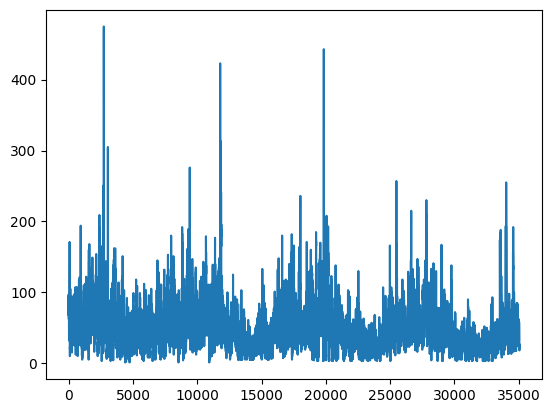

In [ ]:
fig = df['PM10'].plot()

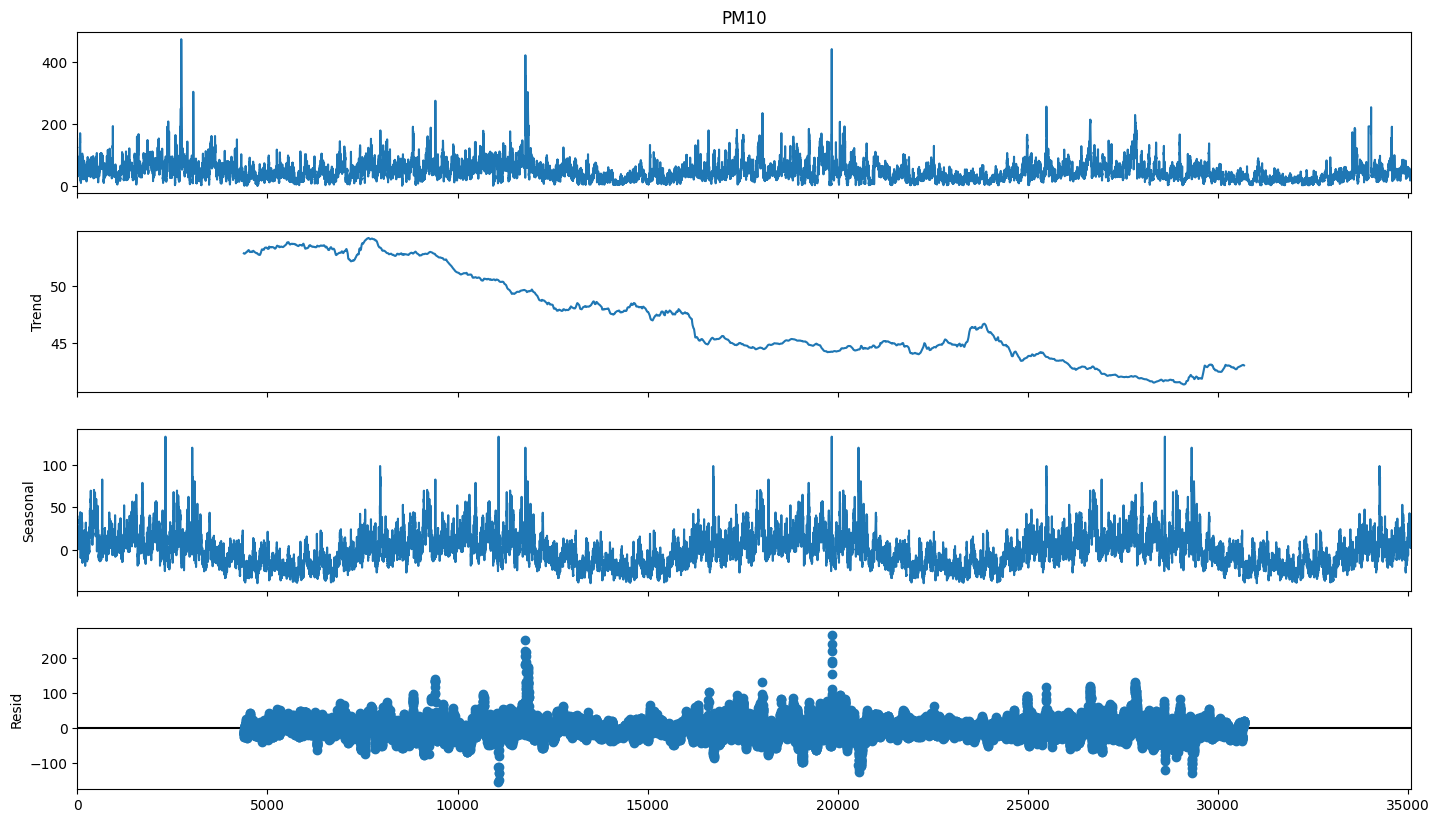

In [ ]:
decompostion = sm.tsa.seasonal_decompose(df['PM10'], model = 'addtive', period = 8760)
fig = decompostion.plot()

fig.set_size_inches(16, 9)

plt.show()

In [ ]:
train_data, test_data = train_test_split(df, test_size = 0.2, shuffle = False)

test_data

,Time,Region,PM10,PM25
28048,2019-03-14 19:00:00,강동구,36.0,16.0
28049,2019-03-14 20:00:00,강동구,40.0,20.0
28050,2019-03-14 21:00:00,강동구,49.0,24.0
28051,2019-03-14 22:00:00,강동구,56.0,31.0
28052,2019-03-14 23:00:00,강동구,63.0,28.0
...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0
35057,2019-12-31 20:00:00,강동구,23.0,17.0
35058,2019-12-31 21:00:00,강동구,25.0,19.0
35059,2019-12-31 22:00:00,강동구,24.0,17.0


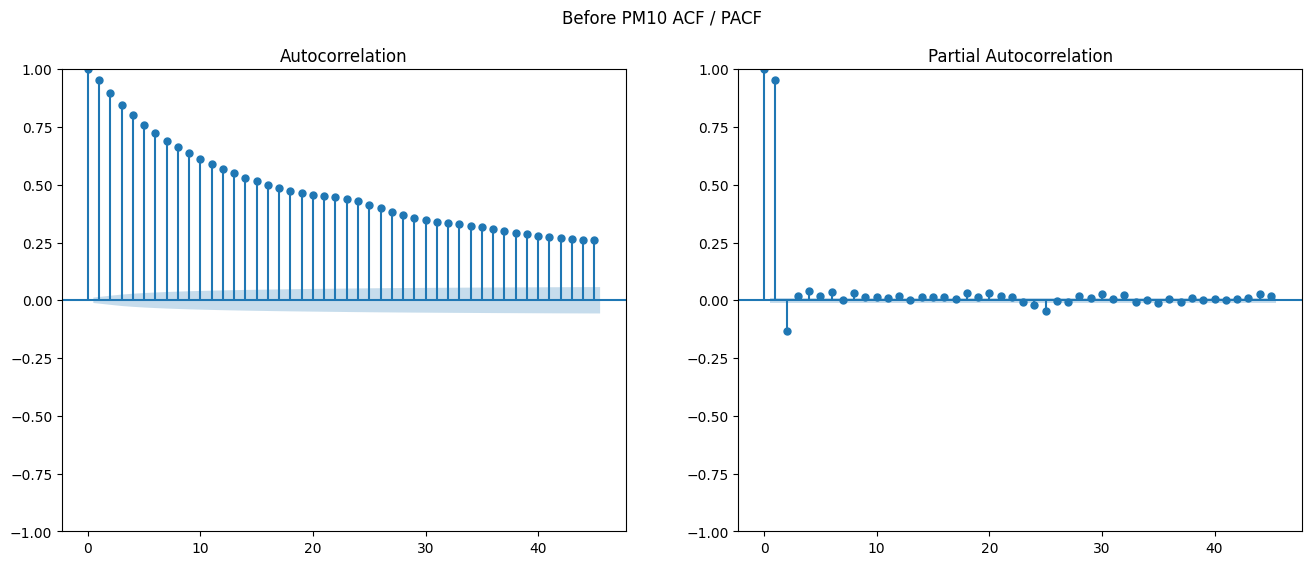

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(train_data['PM10'], ax = ax[0])
plot_pacf(train_data['PM10'], ax = ax[1])

fig.suptitle('Before PM10 ACF / PACF')
plt.show()

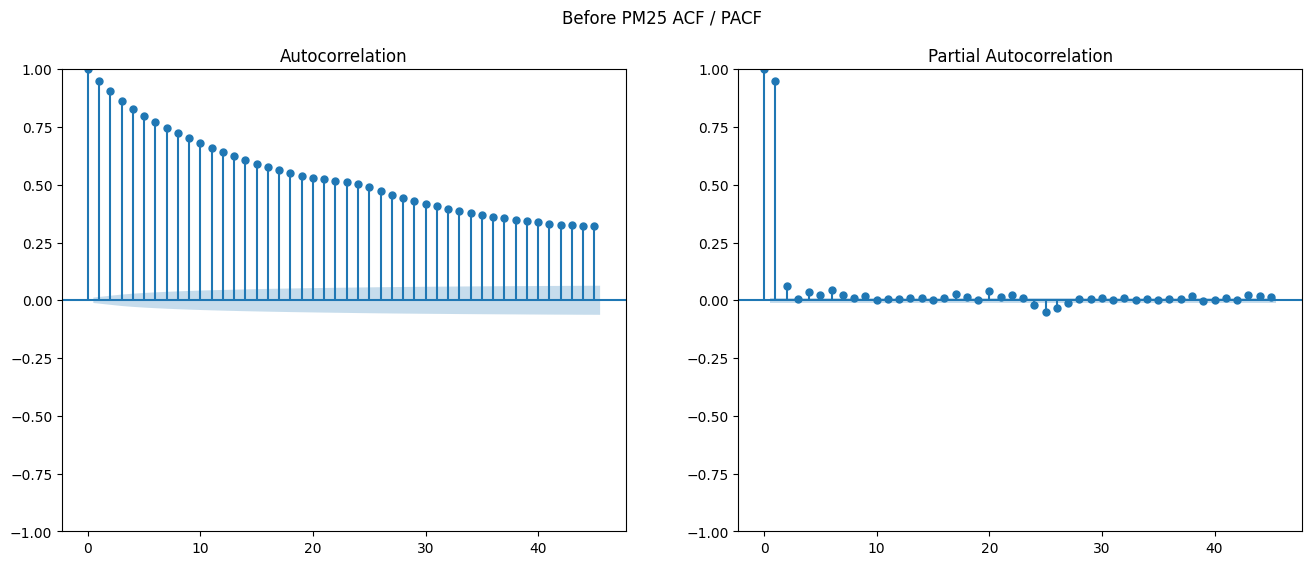

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(train_data['PM25'], ax = ax[0])
plot_pacf(train_data['PM25'], ax = ax[1])
fig.suptitle('Before PM25 ACF / PACF')
plt.show()

In [ ]:
diff_train_data = train_data.copy()

diff_train_data = diff_train_data[['PM10', 'PM25']].diff()
diff_train_data = diff_train_data.dropna()

print('##### 1차 차분 전 데이터 #####')
print(train_data[['PM10', 'PM25']])
print('##### 1차 차분 후 데이터 #####')
print(diff_train_data[['PM10', 'PM25']])

##### 1차 차분 전 데이터 #####
       PM10  PM25
0      87.0  51.0
1      82.0  44.0
2      97.0  58.0
3      88.0  53.0
4      90.0  52.0
...     ...   ...
28043  30.0  13.0
28044  30.0  16.0
28045  31.0  14.0
28046  35.0  15.0
28047  37.0  17.0

[28048 rows x 2 columns]
##### 1차 차분 후 데이터 #####
       PM10  PM25
1      -5.0  -7.0
2      15.0  14.0
3      -9.0  -5.0
4       2.0  -1.0
5     -10.0  -3.0
...     ...   ...
28043  -2.0   0.0
28044   0.0   3.0
28045   1.0  -2.0
28046   4.0   1.0
28047   2.0   2.0

[28047 rows x 2 columns]


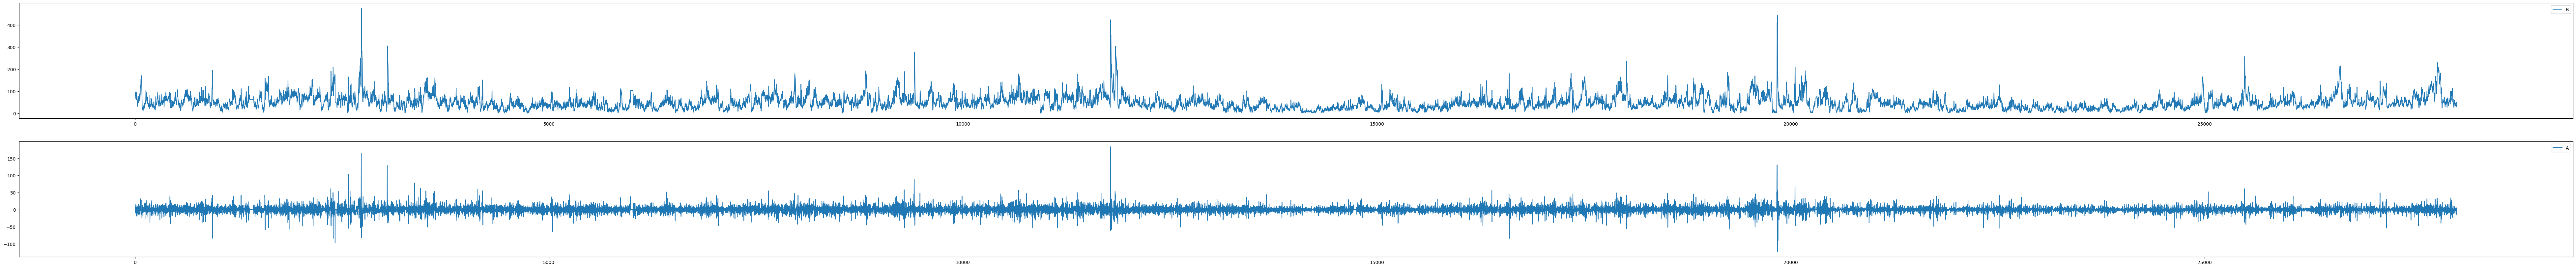

In [ ]:
plt.figure(figsize = (100, 10))

plt.subplot(2, 1, 1)
plt.plot(train_data['PM10'])
plt.legend('Before Diff PM10')

plt.subplot(2, 1, 2)
plt.plot(diff_train_data['PM10'])
plt.legend('After Diff PM10')

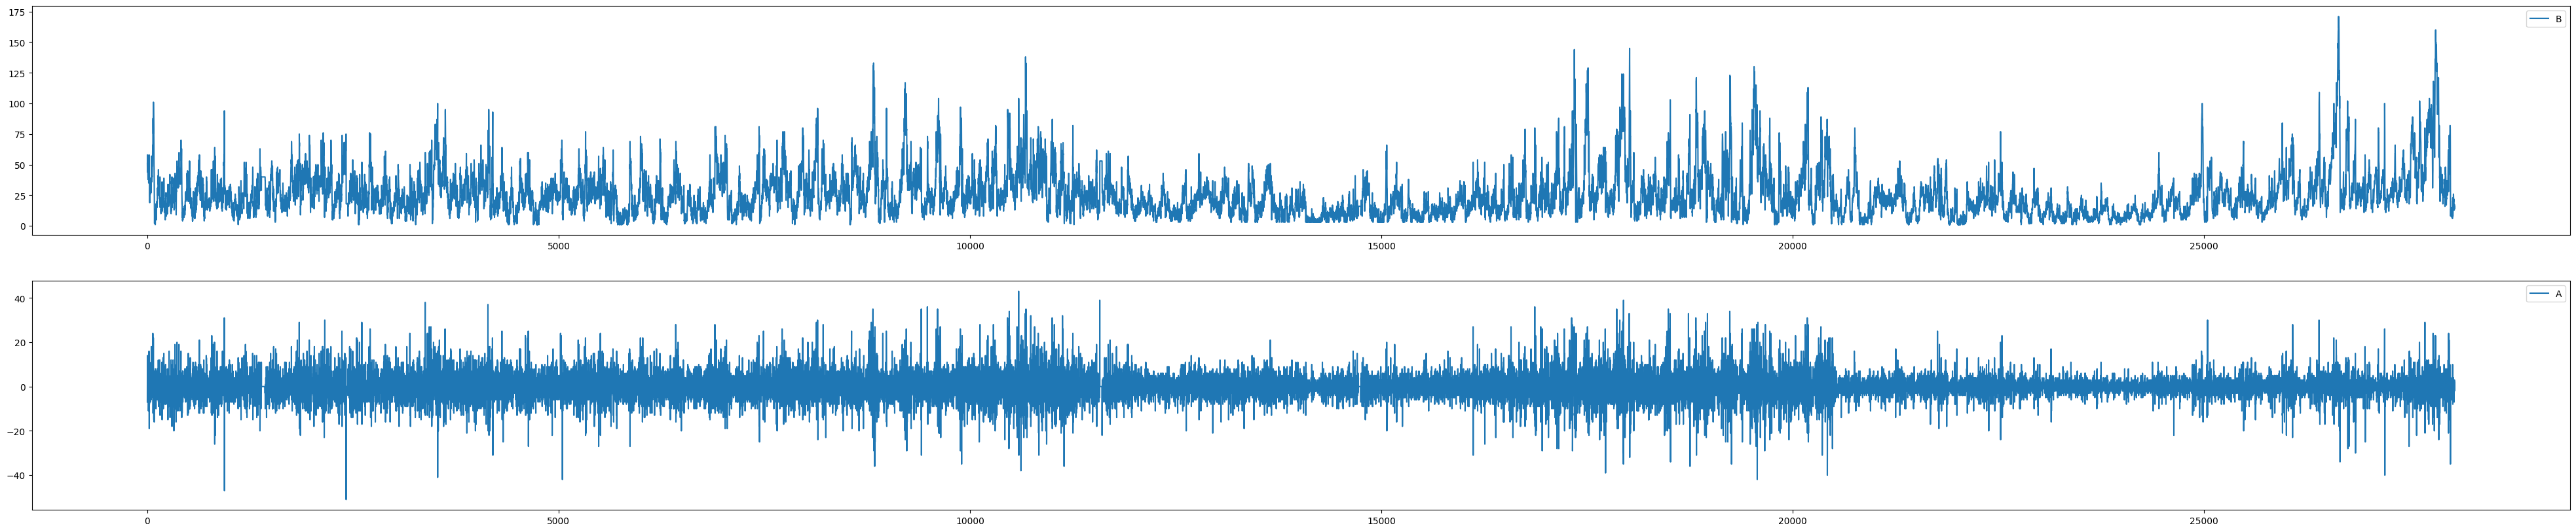

In [ ]:
plt.figure(figsize = (50, 10))

plt.subplot(2, 1, 1)
plt.plot(train_data['PM25'])
plt.legend('Before Diff PM25')

plt.subplot(2, 1, 2)
plt.plot(diff_train_data['PM25'])
plt.legend('After Diff PM25')

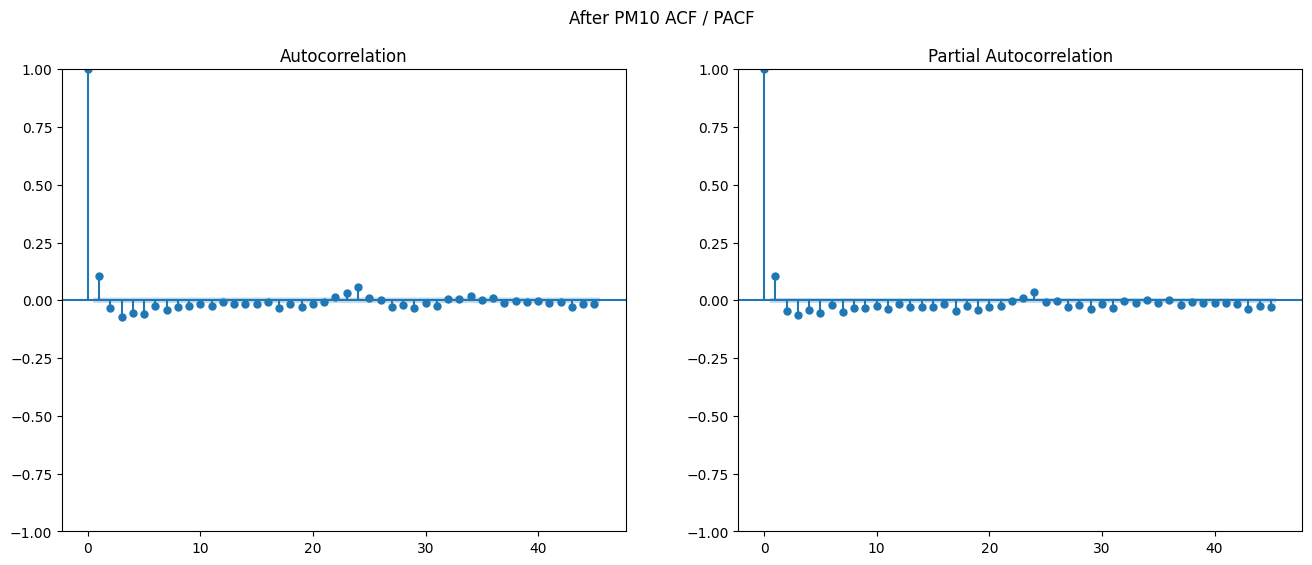

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(diff_train_data['PM10'], ax = ax[0])
plot_pacf(diff_train_data['PM10'], ax = ax[1])

fig.suptitle('After PM10 ACF / PACF')
plt.show()

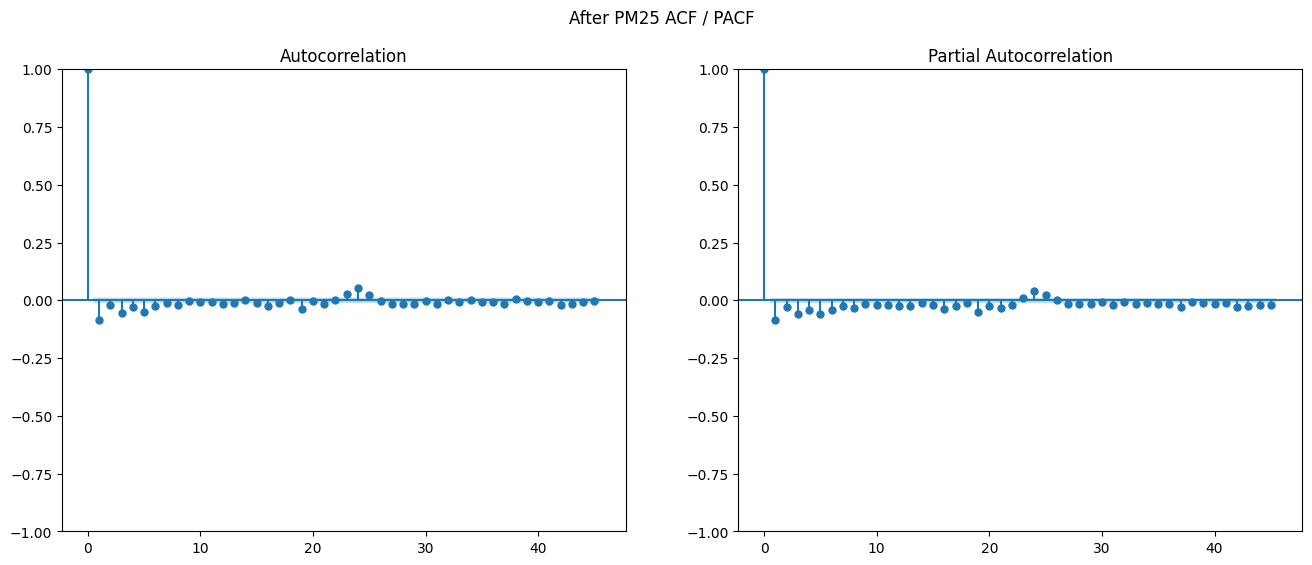

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(diff_train_data['PM25'], ax = ax[0])
plot_pacf(diff_train_data['PM25'], ax = ax[1])

fig.suptitle('After PM25 ACF / PACF')
plt.show()

In [ ]:
model = ARIMA(train_data['PM10'], order = (1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                28048
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -103180.612
Date:                Thu, 08 Aug 2024   AIC                         206367.225
Time:                        06:09:34   BIC                         206391.950
Sample:                             0   HQIC                        206375.183
                              - 28048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0886      0.027     -3.245      0.001      -0.142      -0.035
ma.L1          0.1997      0.028      7.158      0.000       0.145       0.254
sigma2        91.8050      0.281    327.197      0.000      91.255      92.355
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            458026.26
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index = test_data.index[0]
end_index = test_data.index[-1]
pred = model_fit.predict(start=start_index, end=end_index, typ='levels')



# pred = model_fit.predict(start = test_data['PM10'][0], end = test_data['PM10'][-1], typ = 'levels')
# pred.index = test_data.index
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
28048,37.137478
28049,37.125301
28050,37.126380
28051,37.126284
28052,37.126293
...,...
35056,37.126292
35057,37.126292
35058,37.126292
35059,37.126292


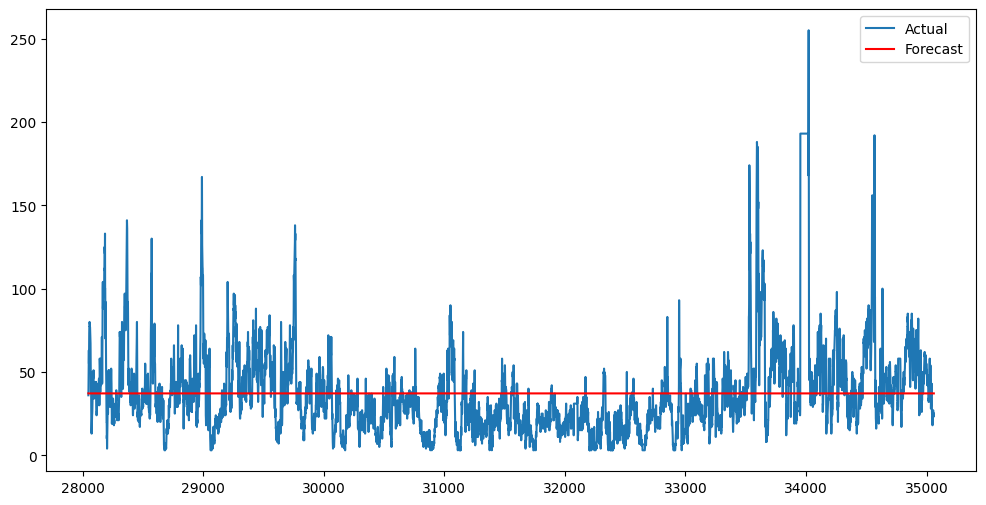

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["PM10"], label='Actual')
plt.plot(pred, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(test_data['PM10'], pred)
print('MSE: ', mse)

MSE:  770.9995826762112


In [ ]:
stepwise_fit = auto_arima(train_data['PM10'], trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=55.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=206712.215, Time=0.89 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=206395.406, Time=1.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206372.820, Time=3.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=206710.216, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=206369.224, Time=9.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=46.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=47.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=206362.314, Time=9.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=206229.433, Time=5.98 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=45.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=206152.334, Time=9.59 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=74.82 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=206009.810, Time=11.10 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                28048
Model:               SARIMAX(0, 1, 5)   Log Likelihood             -102997.906
Date:                Thu, 08 Aug 2024   AIC                         206007.811
Time:                        06:17:51   BIC                         206057.261
Sample:                             0   HQIC                        206023.729
                              - 28048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0969      0.002     42.283      0.000       0.092       0.101
ma.L2         -0.0466      0.003    -15.201      0.000      -0.053      -0.041
ma.L3         -0.0889      0.003    -31.363      0.000      -0.095      -0.083
ma.L4         -0.0702      0.003    -23.017      0.000      -0.076      -0.064
ma.L5         -0.0745      0.003    -23.180      0.000      -0.081      -0.068
sigma2        90.6256      0.276    328.439      0.000      90.085      91.166
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):            483991.03
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train_data['PM10'], order = (1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                28048
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -103180.612
Date:                Thu, 08 Aug 2024   AIC                         206367.225
Time:                        06:18:26   BIC                         206391.950
Sample:                             0   HQIC                        206375.183
                              - 28048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0886      0.027     -3.245      0.001      -0.142      -0.035
ma.L1          0.1997      0.028      7.158      0.000       0.145       0.254
sigma2        91.8050      0.281    327.197      0.000      91.255      92.355
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            458026.26
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index = test_data.index[0]
end_index = test_data.index[-1]
pred = model_fit.predict(start=start_index, end=end_index, typ='levels')



# pred = model_fit.predict(start = test_data['PM10'][0], end = test_data['PM10'][-1], typ = 'levels')
# pred.index = test_data.index
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
28048,37.137478
28049,37.125301
28050,37.126380
28051,37.126284
28052,37.126293
...,...
35056,37.126292
35057,37.126292
35058,37.126292
35059,37.126292


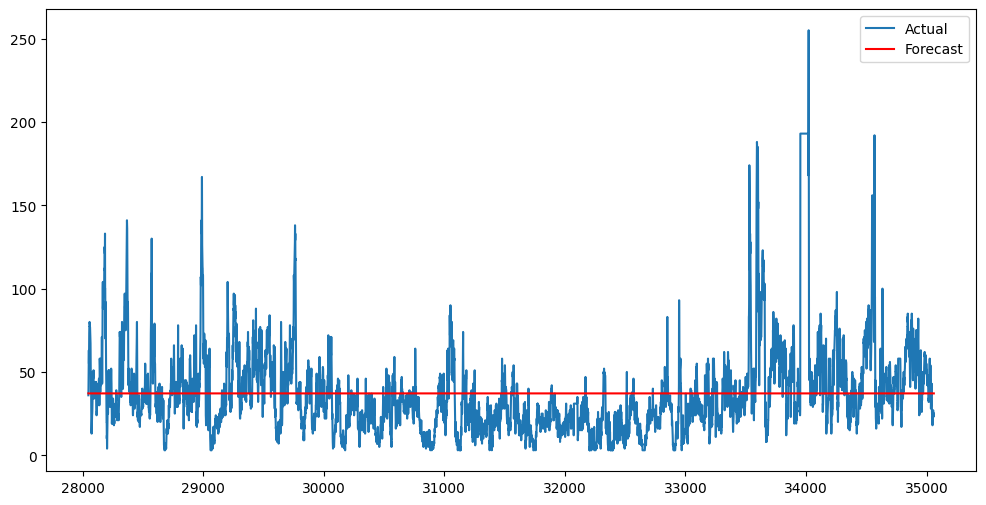

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["PM10"], label='Actual')
plt.plot(pred, label='Forecast', color='red')
plt.legend()
plt.show()

### 기존 3시간 이동평균으로 Nan값 대체한 ARIMA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/Real_total/real_total_GD.csv')

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59


In [ ]:
df['일시'] = pd.to_datetime(df['일시'])

df['year'] = df['일시'].dt.year

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소,year
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59,2016
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59,2016
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59,2016
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59,2016
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59,2019
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59,2019
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59,2019
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59,2019


In [ ]:
datatt = df[['일시', '미세먼지(PM10)', '초미세먼지(PM25)', 'year']]
datatt = datatt.rename(columns = {'일시' : 'time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25'})
datatt

,time,PM10,PM25,year
0,2016-01-01 00:00:00,87.0,51.0,2016
1,2016-01-01 01:00:00,82.0,44.0,2016
2,2016-01-01 02:00:00,97.0,58.0,2016
3,2016-01-01 03:00:00,88.0,53.0,2016
4,2016-01-01 04:00:00,90.0,52.0,2016
...,...,...,...,...
35056,2019-12-31 19:00:00,24.0,18.0,2019
35057,2019-12-31 20:00:00,23.0,17.0,2019
35058,2019-12-31 21:00:00,25.0,19.0,2019
35059,2019-12-31 22:00:00,24.0,17.0,2019


In [ ]:
data = datatt

data

,time,PM10,PM25,year
0,2016-01-01 00:00:00,87.0,51.0,2016
1,2016-01-01 01:00:00,82.0,44.0,2016
2,2016-01-01 02:00:00,97.0,58.0,2016
3,2016-01-01 03:00:00,88.0,53.0,2016
4,2016-01-01 04:00:00,90.0,52.0,2016
...,...,...,...,...
35056,2019-12-31 19:00:00,24.0,18.0,2019
35057,2019-12-31 20:00:00,23.0,17.0,2019
35058,2019-12-31 21:00:00,25.0,19.0,2019
35059,2019-12-31 22:00:00,24.0,17.0,2019


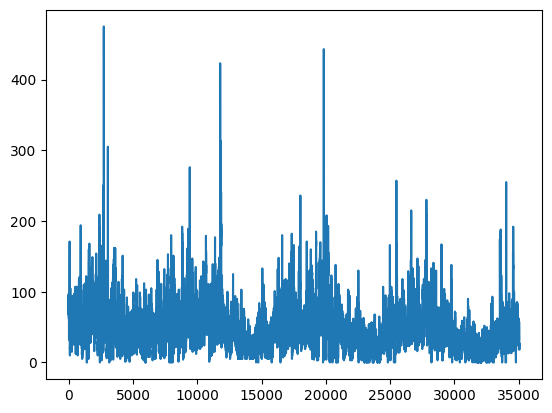

In [ ]:
fig = data['PM10'].plot()

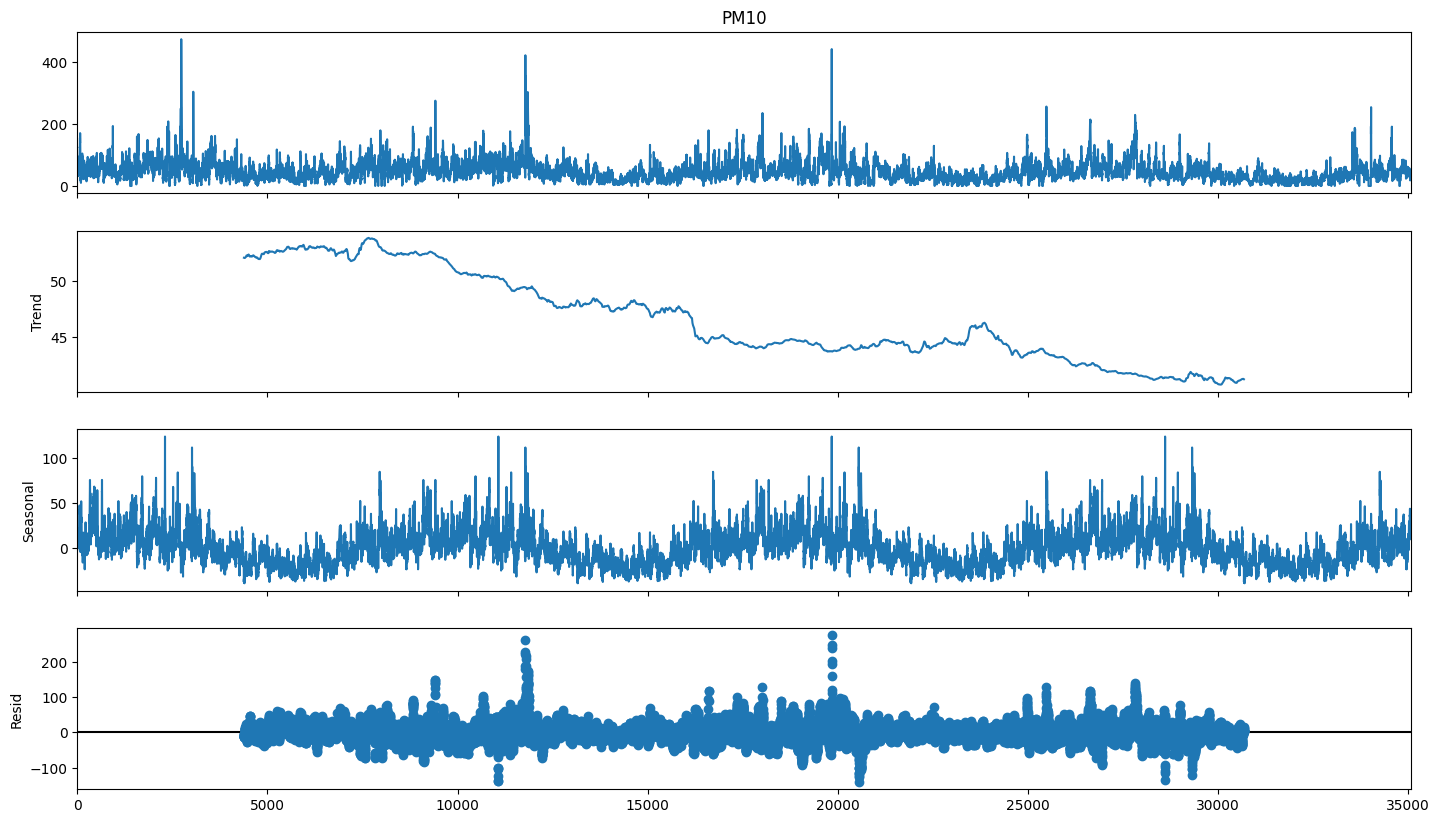

In [ ]:
# period는 계절성의 주기... 미세먼지는 봄가을겨울에 증가하고 여름에 감소하니 1년치 주기가 필요하고 시간별 데이터라서 365 * 24시간인데 윤년의 경우 366 * 24로 해야한다
decompostion = sm.tsa.seasonal_decompose(data['PM10'], model = 'addtive', period = 8766)
fig = decompostion.plot()

fig.set_size_inches(16, 9)

plt.show()

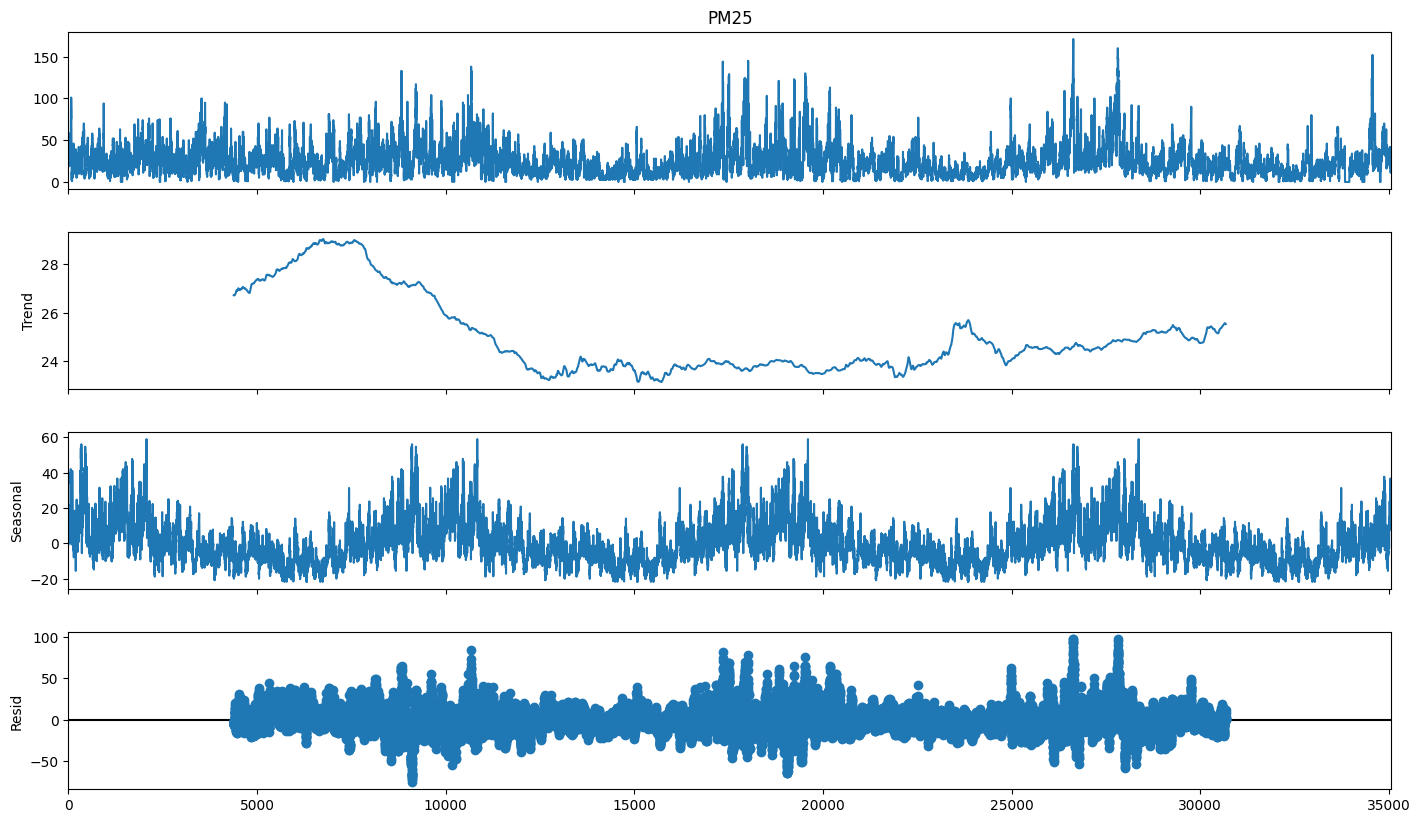

In [ ]:
decompostion = sm.tsa.seasonal_decompose(data['PM25'], model = 'addtive', period = 8766)
fig = decompostion.plot()

fig.set_size_inches(16, 9)

plt.show()

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle = False)

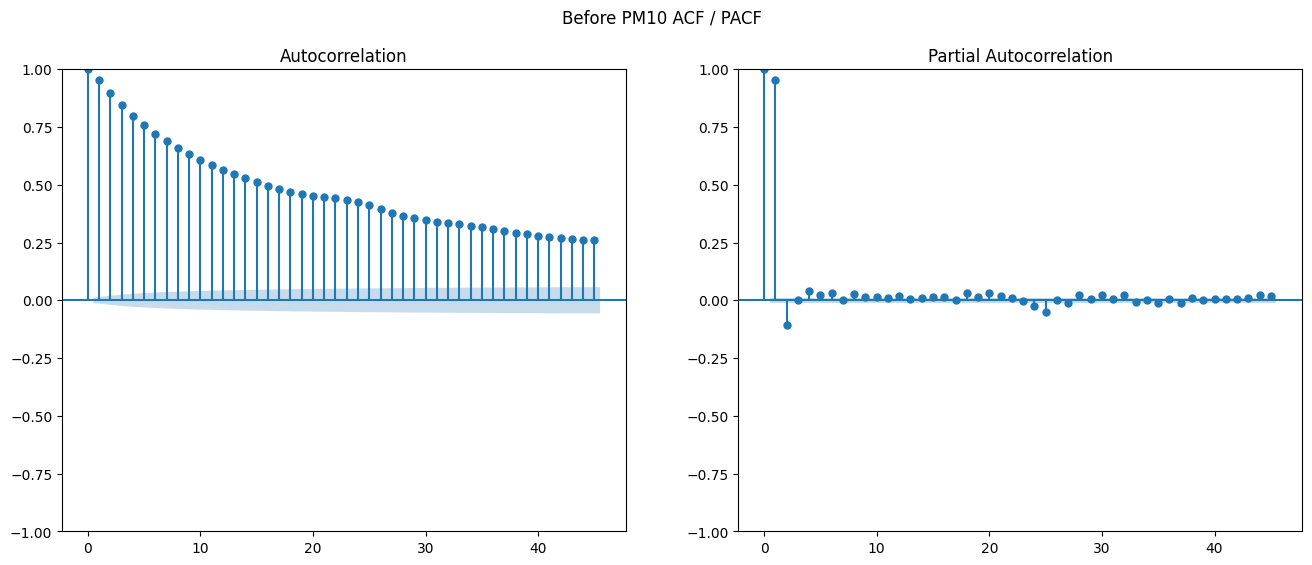

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(train_data['PM10'], ax = ax[0])
plot_pacf(train_data['PM10'], ax = ax[1])

fig.suptitle('Before PM10 ACF / PACF')
plt.show()

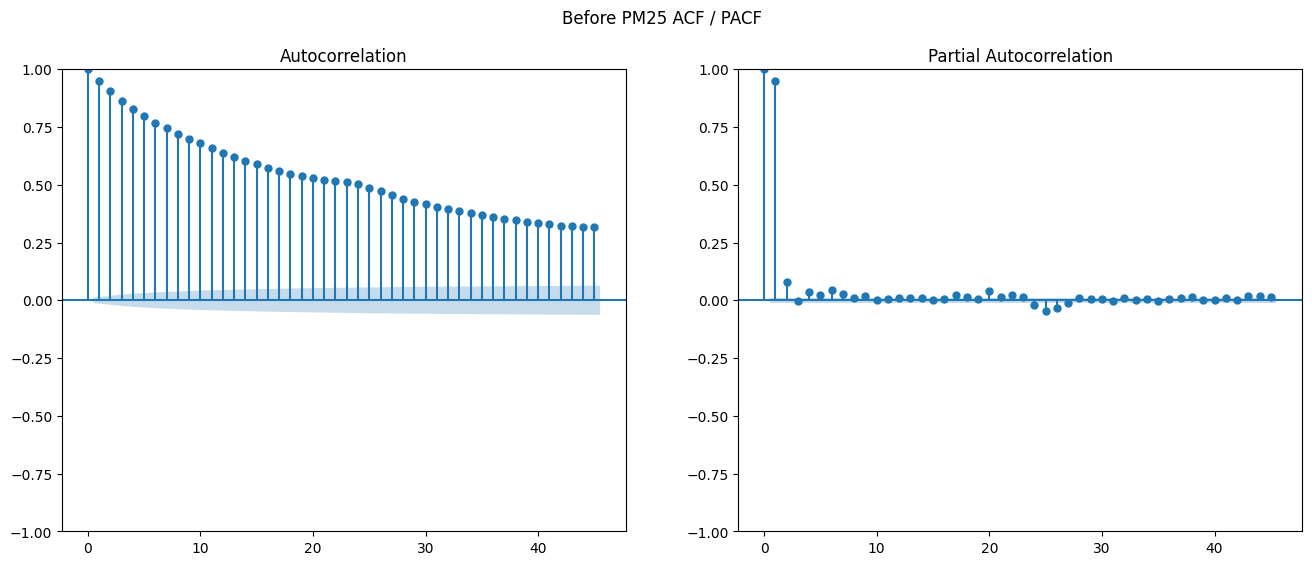

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(train_data['PM25'], ax = ax[0])
plot_pacf(train_data['PM25'], ax = ax[1])
fig.suptitle('Before PM25 ACF / PACF')
plt.show()

In [ ]:
diff_train_data = train_data.copy()

diff_train_data = diff_train_data[['PM10', 'PM25']].diff()
diff_train_data = diff_train_data.dropna()

print('##### 1차 차분 전 데이터 #####')
print(train_data[['PM10', 'PM25']])
print('##### 1차 차분 후 데이터 #####')
print(diff_train_data[['PM10', 'PM25']])

##### 1차 차분 전 데이터 #####
       PM10  PM25
0      87.0  51.0
1      82.0  44.0
2      97.0  58.0
3      88.0  53.0
4      90.0  52.0
...     ...   ...
28043  30.0  13.0
28044  30.0  16.0
28045  31.0  14.0
28046  35.0  15.0
28047  37.0  17.0

[28048 rows x 2 columns]
##### 1차 차분 후 데이터 #####
       PM10  PM25
1      -5.0  -7.0
2      15.0  14.0
3      -9.0  -5.0
4       2.0  -1.0
5     -10.0  -3.0
...     ...   ...
28043  -2.0   0.0
28044   0.0   3.0
28045   1.0  -2.0
28046   4.0   1.0
28047   2.0   2.0

[28047 rows x 2 columns]


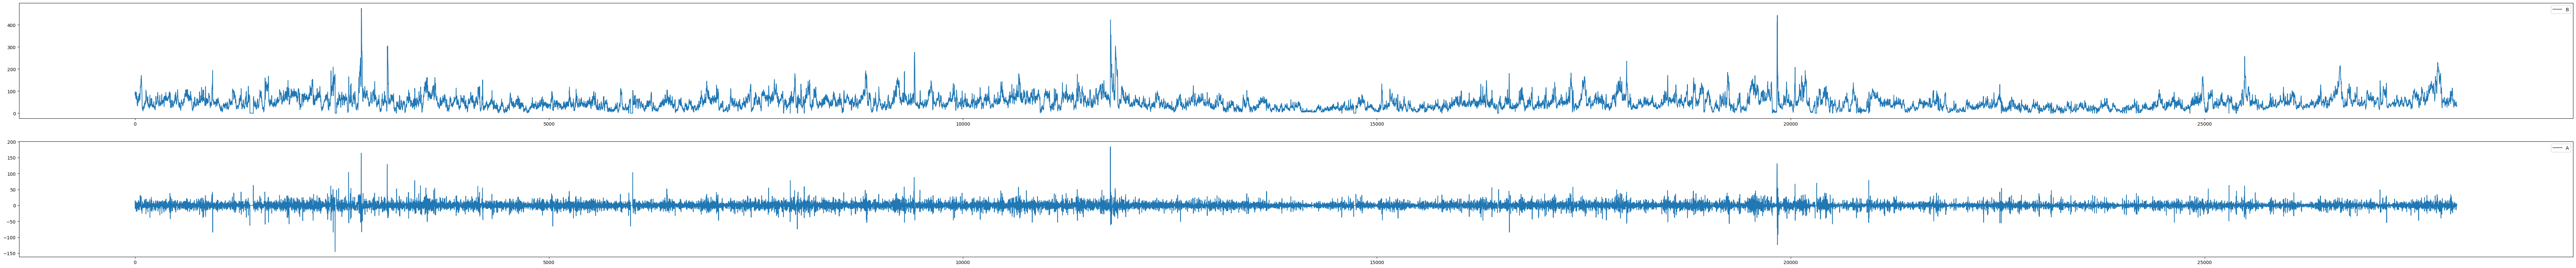

In [ ]:
plt.figure(figsize = (100, 10))

plt.subplot(2, 1, 1)
plt.plot(train_data['PM10'])
plt.legend('Before Diff PM10')

plt.subplot(2, 1, 2)
plt.plot(diff_train_data['PM10'])
plt.legend('After Diff PM10')

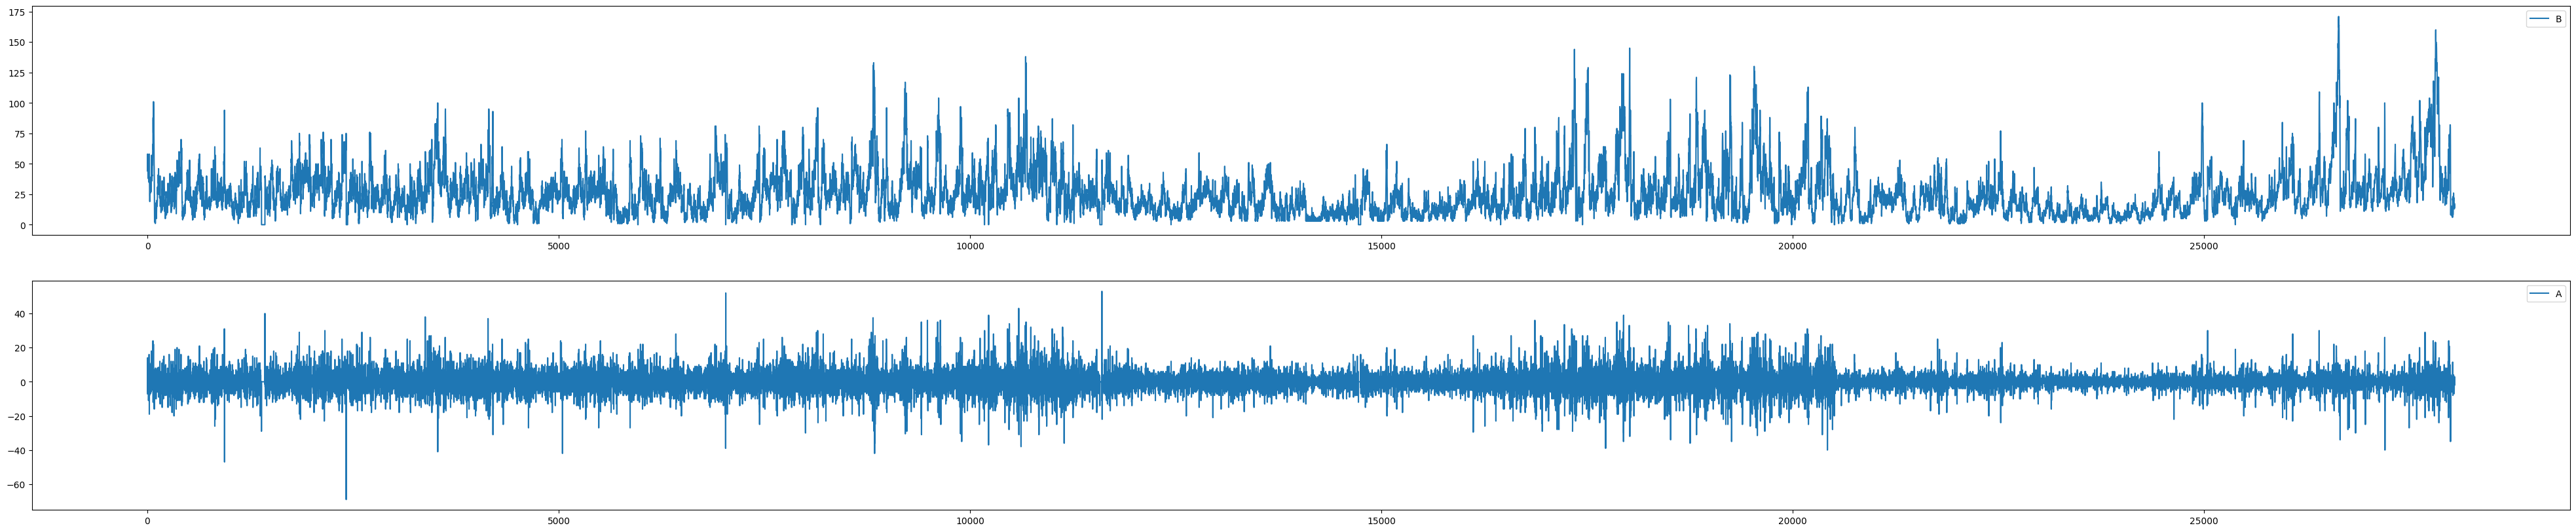

In [ ]:
plt.figure(figsize = (50, 10))

plt.subplot(2, 1, 1)
plt.plot(train_data['PM25'])
plt.legend('Before Diff PM25')

plt.subplot(2, 1, 2)
plt.plot(diff_train_data['PM25'])
plt.legend('After Diff PM25')

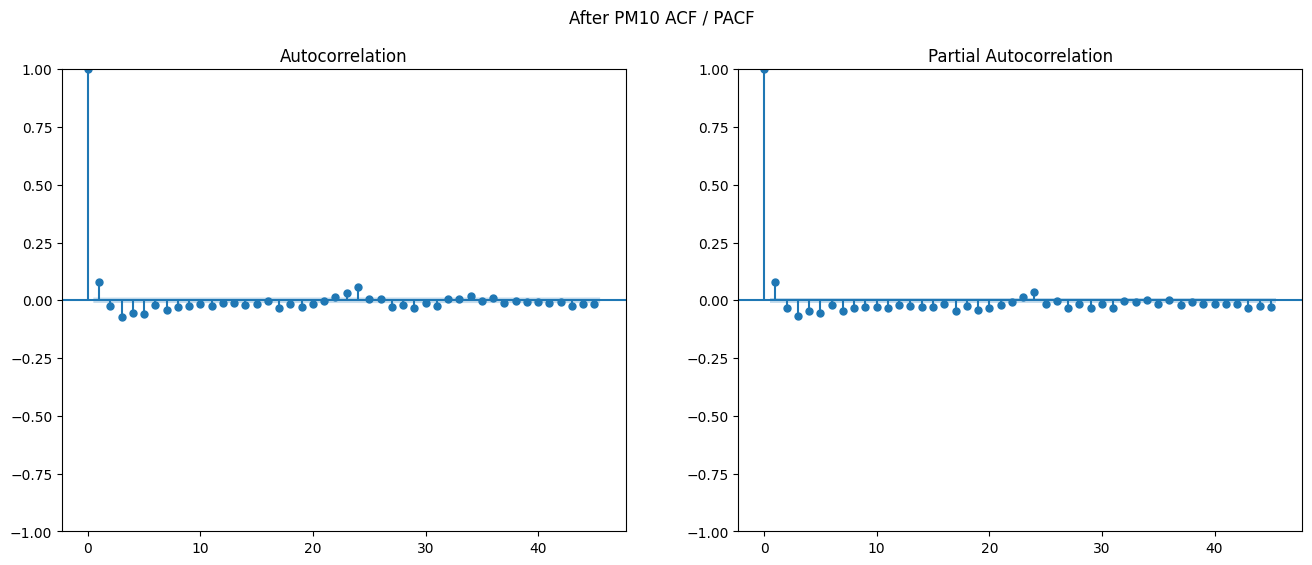

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(diff_train_data['PM10'], ax = ax[0])
plot_pacf(diff_train_data['PM10'], ax = ax[1])

fig.suptitle('After PM10 ACF / PACF')
plt.show()

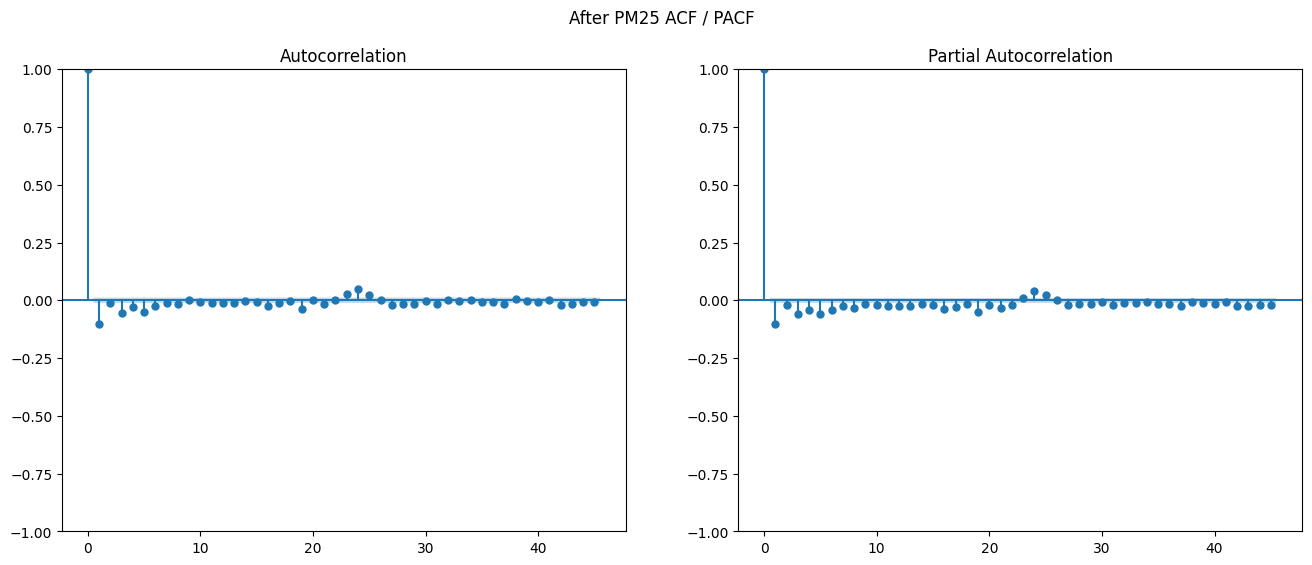

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_acf(diff_train_data['PM25'], ax = ax[0])
plot_pacf(diff_train_data['PM25'], ax = ax[1])

fig.suptitle('After PM25 ACF / PACF')
plt.show()

In [ ]:
model = ARIMA(train_data['PM10'], order = (1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                28048
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -103994.392
Date:                Thu, 08 Aug 2024   AIC                         207994.783
Time:                        05:57:05   BIC                         208019.508
Sample:                             0   HQIC                        208002.742
                              - 28048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0726      0.038     -1.914      0.056      -0.147       0.002
ma.L1          0.1556      0.038      4.047      0.000       0.080       0.231
sigma2        97.3250      0.277    351.797      0.000      96.783      97.867
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            528822.98
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index = test_data.index[0]
end_index = test_data.index[-1]
pred = model_fit.predict(start=start_index, end=end_index, typ='levels')



# pred = model_fit.predict(start = test_data['PM10'][0], end = test_data['PM10'][-1], typ = 'levels')
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
28048,37.116258
28049,37.107822
28050,37.108434
28051,37.108389
28052,37.108393
...,...
35056,37.108392
35057,37.108392
35058,37.108392
35059,37.108392


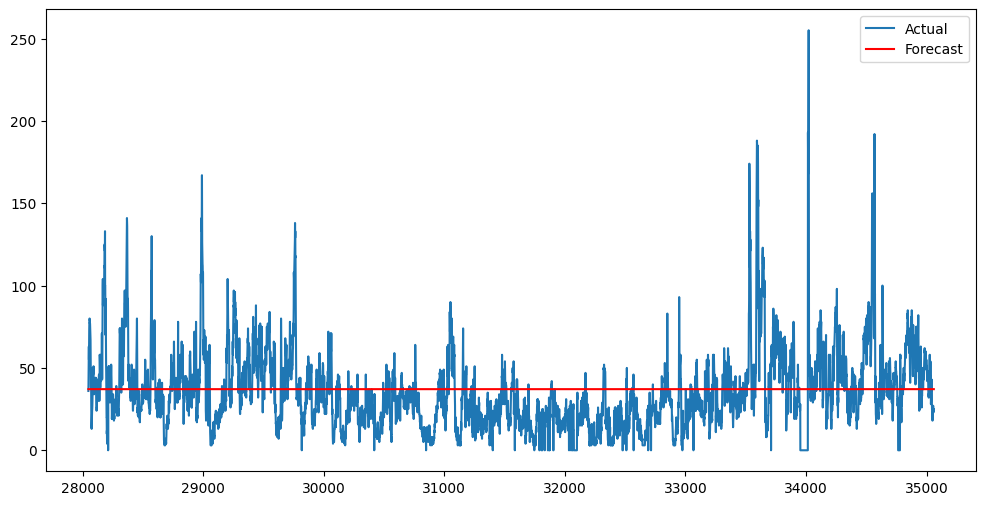

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["PM10"], label='Actual')
plt.plot(pred, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
stepwise_fit = auto_arima(train_data['PM10'], trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=44.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=208186.218, Time=0.89 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=208006.009, Time=1.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=207997.228, Time=4.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=208184.219, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=207996.783, Time=7.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=63.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=47.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=207992.736, Time=5.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=207864.373, Time=6.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=56.83 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=207771.271, Time=9.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=79.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=207639.442, Time=12.04 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                28048
Model:               SARIMAX(0, 1, 5)   Log Likelihood             -103812.722
Date:                Thu, 08 Aug 2024   AIC                         207637.443
Time:                        06:05:59   BIC                         207686.893
Sample:                             0   HQIC                        207653.361
                              - 28048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0690      0.002     30.801      0.000       0.065       0.073
ma.L2         -0.0380      0.003    -12.044      0.000      -0.044      -0.032
ma.L3         -0.0874      0.003    -29.471      0.000      -0.093      -0.082
ma.L4         -0.0729      0.003    -23.691      0.000      -0.079      -0.067
ma.L5         -0.0719      0.003    -22.087      0.000      -0.078      -0.066
sigma2        96.0386      0.274    351.131      0.000      95.502      96.575
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):            553935.31
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train_data['PM10'], order = (0, 1, 5))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                28048
Model:                 ARIMA(0, 1, 5)   Log Likelihood             -103812.722
Date:                Thu, 08 Aug 2024   AIC                         207637.443
Time:                        06:06:38   BIC                         207686.893
Sample:                             0   HQIC                        207653.361
                              - 28048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0690      0.002     30.801      0.000       0.065       0.073
ma.L2         -0.0380      0.003    -12.044      0.000      -0.044      -0.032
ma.L3         -0.0874      0.003    -29.471      0.000      -0.093      -0.082
ma.L4         -0.0729      0.003    -23.691      0.000      -0.079      -0.067
ma.L5         -0.0719      0.003    -22.087      0.000      -0.078      -0.066
sigma2        96.0386      0.274    351.131      0.000      95.502      96.575
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):            553935.31
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index = test_data.index[0]
end_index = test_data.index[-1]
pred = model_fit.predict(start=start_index, end=end_index, typ='levels')



# pred = model_fit.predict(start = test_data['PM10'][0], end = test_data['PM10'][-1], typ = 'levels')
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
28048,37.255105
28049,37.019549
28050,36.676154
28051,36.344235
28052,36.226442
...,...
35056,36.226442
35057,36.226442
35058,36.226442
35059,36.226442


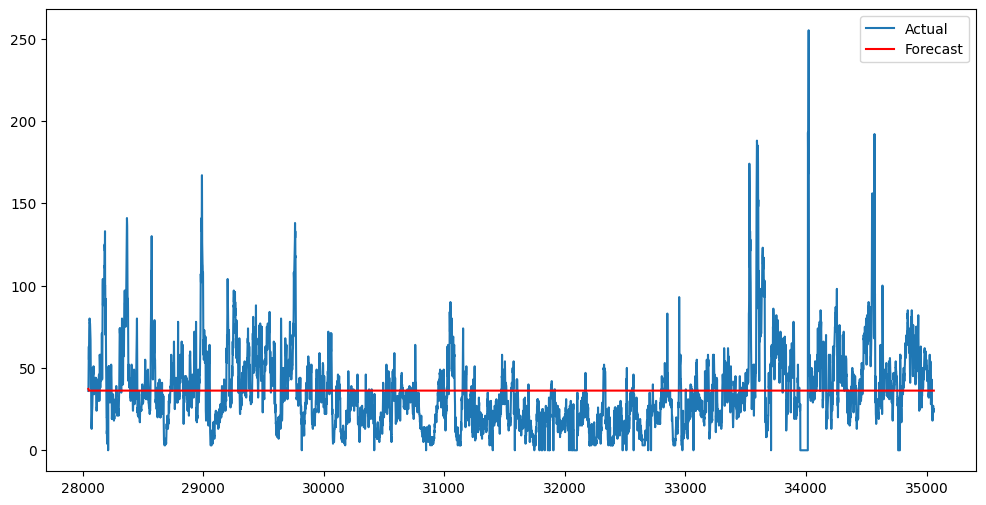

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["PM10"], label='Actual')
plt.plot(pred, label='Forecast', color='red')
plt.legend()
plt.show()